In [1]:
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout,Flatten
import tensorflow as tf
#creating a model
model=Sequential()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 28s 2us/step


In [2]:
input_width=28
input_height=28
no_of_channels=1
x_train=x_train.reshape(-1,input_width,input_height,no_of_channels)
x_train.shape

(60000, 28, 28, 1)

In [3]:
x_test=x_test.reshape(-1,input_width,input_height,no_of_channels)


In [4]:
layer1=Conv2D(input_shape=(input_width,input_height,no_of_channels),
              filters=(32),kernel_size=(5,5),padding='SAME',activation='relu')
layer2=MaxPool2D(pool_size=(2, 2))
layer3=Conv2D(filters=(64),kernel_size=(5,5),padding='SAME',activation='relu')
layer4=MaxPool2D(pool_size=(2, 2))
layer5=Dropout(.2)
layer6=Flatten()
layer7=Dense(1024, activation='sigmoid') 
layer8=Dense(10, activation='softmax')

In [5]:
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)
model.add(layer5)
model.add(layer6)
model.add(layer7)
model.add(layer8)

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
y_train=onehot.fit_transform(y_train.reshape(-1,1)).todense()
y_test=onehot.transform(y_test.reshape(-1,1)).todense()

In [8]:
model.fit(x_train, y_train, epochs=5,batch_size=500) 

Epoch 1/5
120/120 [==============================] - 136s 1s/step - loss: 0.2273 - accuracy: 0.6705
Epoch 2/5
120/120 [==============================] - 140s 1s/step - loss: 0.0167 - accuracy: 0.9804
Epoch 3/5
120/120 [==============================] - 137s 1s/step - loss: 0.0089 - accuracy: 0.9893
Epoch 4/5
120/120 [==============================] - 131s 1s/step - loss: 0.0066 - accuracy: 0.9920
Epoch 5/5
120/120 [==============================] - 148s 1s/step - loss: 0.0055 - accuracy: 0.9927


In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 8s 23ms/step - loss: 0.0049 - accuracy: 0.9928


[0.004936321172863245, 0.9927999973297119]

In [10]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 53s 28ms/step - loss: 0.0033 - accuracy: 0.9965


[0.003347477875649929, 0.9965000152587891]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3

In [14]:
model.save(r'C:\Users\suraj\Desktop\Work\Model')

INFO:tensorflow:Assets written to: C:\Users\suraj\Desktop\Work\Model\assets


In [15]:
from keras.models import Sequential,load_model

model1=load_model(r'C:\Users\suraj\Desktop\Work\Model')

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3

In [17]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.0049 - accuracy: 0.9928 0s - loss: 0.0048 - ac - ETA: 0s - loss: 0.0050 - accuracy: 0.


[0.004936321172863245, 0.9927999973297119]

In [18]:
x_test.shape

(10000, 28, 28, 1)

In [19]:
first_image=x_test[0]
first_image=first_image.reshape(-1,input_height,input_width,no_of_channels)

In [20]:
first_image.shape

(1, 28, 28, 1)

In [21]:
import numpy as np
np.argmax(model1.predict(first_image))

7

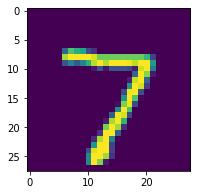

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(3,3))
ax=fig.add_subplot(1,1,1)
ax.imshow(first_image.reshape(input_height,input_width))

In [ ]:
import skimage
from skimage.io import imread
file_path='/home/suraj/Apps/Minor Project 1/mnist_png-master/mnist_png/testing/2/222.png'
img = skimage.io.imread(file_path)

In [ ]:
image=img.reshape(1,28,28,1)

In [ ]:
np.argmax(model1.predict(image))